In [1]:
import requests
import pandas as pd
import datetime
import json
from matplotlib import pyplot as plt
from ta import *

In [2]:
start = datetime.datetime(year=2016, month=1, day=1)
start = datetime.datetime.timestamp(start)
start

1451624400.0

In [3]:
def fetch_poloniex_df(currency_pair, start=int(start), end=9999999999, period=14400):
    data = fetch_poloniex(currency_pair, start, end, period)
    df = pd.DataFrame(data)
    df["date"] = df["date"].apply(lambda d: datetime.datetime.utcfromtimestamp(d))
    return df

def fetch_poloniex(currency_pair, start=int(start), end=9999999999, period=14400):
    api = "https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}"
    api = api.format(currency_pair, start, end, period)
    r = requests.get(api)
    return json.loads(r.text)

In [4]:
test = datetime.datetime(year=2019, month=8, day=1)
test = datetime.datetime.timestamp(test)
data = fetch_poloniex("BTC_ETH", start=test, period=14400)
data[0:3]

[{'date': 1564632000,
  'high': 0.02147501,
  'low': 0.02135046,
  'open': 0.02137658,
  'close': 0.02144642,
  'volume': 4.10018497,
  'quoteVolume': 191.61698154,
  'weightedAverage': 0.02139781},
 {'date': 1564646400,
  'high': 0.02144488,
  'low': 0.0213117,
  'open': 0.02144452,
  'close': 0.02142001,
  'volume': 5.10496874,
  'quoteVolume': 238.63837148,
  'weightedAverage': 0.02139206},
 {'date': 1564660800,
  'high': 0.02143395,
  'low': 0.02123171,
  'open': 0.02142018,
  'close': 0.02133456,
  'volume': 15.57093198,
  'quoteVolume': 731.52269801,
  'weightedAverage': 0.02128564}]

In [5]:
btc_df = fetch_poloniex_df("USDC_BTC", start=test, period=14400)
btc_df["mean"] = (btc_df["high"] + btc_df["low"])/2

btc_df = btc_df.rename(columns={"weightedAverage": "price"})
btc_df.head()

,close,date,high,low,open,quoteVolume,volume,price,mean
0,9963.604400,2019-08-01 04:00:00,10015.686156,9881.145482,10015.686156,62.787138,6.248948e+05,9952.592011,9948.415819
1,9984.881804,2019-08-01 08:00:00,9997.966805,9924.378783,9956.490406,9.993627,9.964055e+04,9970.409390,9961.172794
2,10015.370584,2019-08-01 12:00:00,10068.011990,9968.577530,9984.714252,16.511151,1.655882e+05,10028.873366,10018.294760
3,10289.200000,2019-08-01 16:00:00,10289.200000,10014.237898,10015.370584,60.370326,6.149922e+05,10186.995041,10151.718949
4,10417.202886,2019-08-01 20:00:00,10484.000000,10290.000000,10290.000000,128.289368,1.336574e+06,10418.433219,10387.000000


---

C:\Users\Brian\Anaconda3\envs\bitz\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


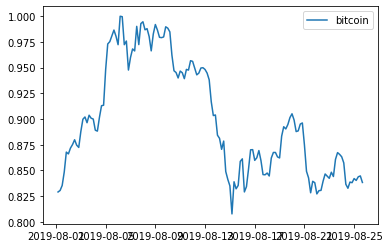

In [6]:
maxVal = btc_df["price"].max()
btc_df["btc_norm"] = btc_df["price"].apply(lambda val: val/maxVal)

plt.plot(btc_df["date"], btc_df["btc_norm"])
plt.legend(["bitcoin"])

plt.show()

---

In [7]:
btc_df.head()

,close,date,high,low,open,quoteVolume,volume,price,mean,btc_norm
0,9963.604400,2019-08-01 04:00:00,10015.686156,9881.145482,10015.686156,62.787138,6.248948e+05,9952.592011,9948.415819,0.828953
1,9984.881804,2019-08-01 08:00:00,9997.966805,9924.378783,9956.490406,9.993627,9.964055e+04,9970.409390,9961.172794,0.830437
2,10015.370584,2019-08-01 12:00:00,10068.011990,9968.577530,9984.714252,16.511151,1.655882e+05,10028.873366,10018.294760,0.835307
3,10289.200000,2019-08-01 16:00:00,10289.200000,10014.237898,10015.370584,60.370326,6.149922e+05,10186.995041,10151.718949,0.848477
4,10417.202886,2019-08-01 20:00:00,10484.000000,10290.000000,10290.000000,128.289368,1.336574e+06,10418.433219,10387.000000,0.867753


In [121]:
import importlib
import find_poi2
importlib.reload(find_poi2)


data = list(zip(btc_df.date.to_list(), btc_df.price.to_list()))
breakouts = find_poi2.find(data, 0.05, window_size=5, merge_intervals=True)

In [122]:
breakouts = np.array(breakouts)

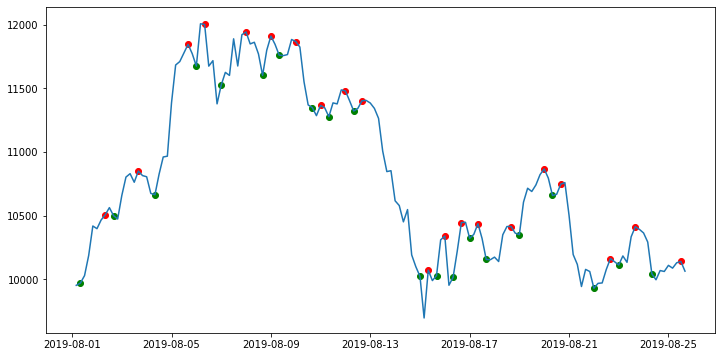

In [123]:
fig = plt.figure(figsize=(12, 6))


plt.plot(btc_df["date"], btc_df["price"], figure=fig)

plt.scatter(btc_df.iloc[breakouts[:, 0]].date, btc_df.iloc[breakouts[:, 0]].price, color="green")
plt.scatter(btc_df.iloc[breakouts[:, 1]].date, btc_df.iloc[breakouts[:, 1]].price, color="red")


#plt.legend(["bitcoin", "Start", "End"])


plt.show()

---

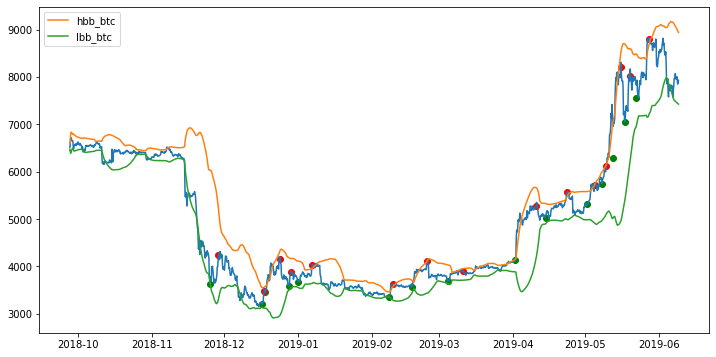

In [32]:
btc_df["btc_bb_high"] = bollinger_hband(btc_df["price"], n=60, ndev=2, fillna=True)
btc_df["btc_bb_low"] = bollinger_lband(btc_df["price"], n=60, ndev=2, fillna=True)


fig = plt.figure(figsize=(12, 6))


plt.plot(btc_df["date"], btc_df["price"], figure=fig)
plt.plot(btc_df["date"], btc_df["btc_bb_high"], label="hbb_btc")
plt.plot(btc_df["date"], btc_df["btc_bb_low"], label="lbb_btc")


plt.scatter(btc_df.iloc[bounds_df["start_index"]]["date"], bounds_df["start_y"], color="green")
plt.scatter(btc_df.iloc[bounds_df["end_index"]]["date"], bounds_df["end_y"], color="red")

plt.legend()




plt.show()

---

# Featuring


btc_df.head(3)